# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


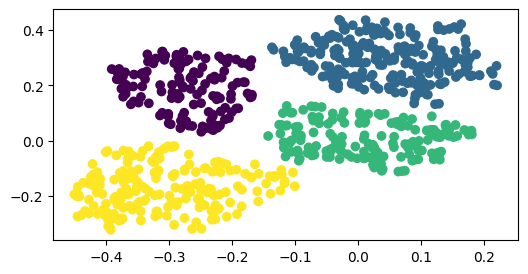

In [3]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [5]:
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  n_samples = Dx.shape[0]
  # Elegimos los centros iniciales entre el conjunto de datos
  indices = np.random.choice(n_samples, K, replace=False)
  cDx = Dx[indices]## P1. Tu código aquí ##
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 0.01986    0.228325 ]
 [-0.299444  -0.198113 ]
 [ 0.0640767  0.337841 ]
 [-0.413849  -0.113314 ]]


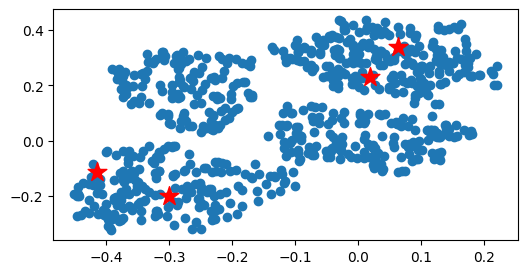

In [6]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [7]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)## P2. Tu código aquí ##

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

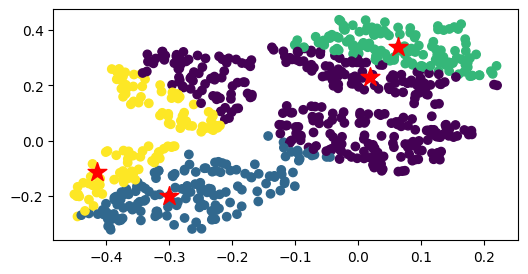

In [8]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [9]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = (Dyp == k)## P3. Tu código aquí ##

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.

      mat =  matriz_distancias(Dx[indices_elementos_k], distancia_euclidiana)## P4. Tu código aquí ##

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
      # el mínimo de un vector y nos devuelve su índice).

      ic =np.where(Dyp==k)[0][np.argmin(np.sum(mat, axis=1))]

      # Asignamos como centro del cluster al elemento del cluster que ofrece
      # la menor distancia con respecto a todos los demás
      cDx[k,:] =  cDx_ant[k,:]## P5. Tu código aquí ##
  return cDx

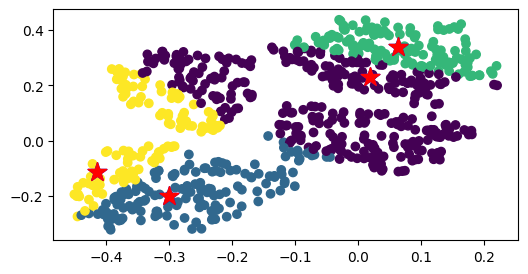

In [10]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [11]:
def MyKMedoide(Dx, K):
  cDx = paso1_elije_medoides(K, Dx) ## P6. Tu código aquí ##
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)## P7. Tu código aquí ##
    # Calcular los nuevos centros
    cDx =  paso3_actualiza_medoides(Dx, cDx, Dyp, K)## P8. Tu código aquí ##
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

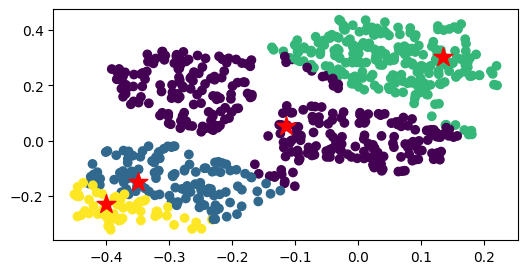

In [12]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


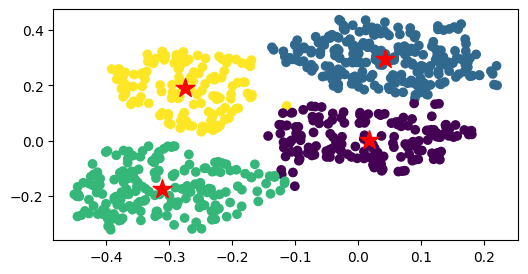

In [13]:
from sklearn.cluster import KMeans

modelo = KMeans(4)
modelo.fit(Dx)
modelo.predict(Dx)
Dyp_sk =  modelo.predict(Dx)## P9.1 Tu código aquí ##
# Obtener los centros de los clústeres
cDx_sk =modelo.cluster_centers_ ## P9.2 Tu código aquí ##

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [16]:
 ## P10. Tu código aquí ##
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pandas as pd

# métricas para K-Means++
sil_kmeans = silhouette_score(Dx, Dyp_sk)
ch_kmeans = calinski_harabasz_score(Dx, Dyp_sk)

# métricas para K-Medoids
sil_kmedoids = silhouette_score(Dx, Dyp)
ch_kmedoids = calinski_harabasz_score(Dx, Dyp)

resultados = pd.DataFrame({
    'Métrica': ['Silhouette Score (Max=1)', 'Calinski-Harabasz (Mayor es mejor)'],
    'K-Means++': [sil_kmeans, ch_kmeans],
    'K-Medoids': [sil_kmedoids, ch_kmedoids]
})

print(resultados)

if sil_kmeans > sil_kmedoids:
    print(f"K-Means++ agrupa mejor según la Silueta ({sil_kmeans:.4f} vs {sil_kmedoids:.4f})")
else:
    print(f"K-Medoids agrupa mejor según la Silueta ({sil_kmedoids:.4f} vs {sil_kmeans:.4f})")

                              Métrica    K-Means++   K-Medoids
0            Silhouette Score (Max=1)     0.536164    0.308910
1  Calinski-Harabasz (Mayor es mejor)  1346.000626  537.550857
K-Means++ agrupa mejor según la Silueta (0.5362 vs 0.3089)


**CONCLUSIÓN:** se concluye que K-Means++ ofrece un agrupamiento significativamente superior al de K-Medoids para este conjunto de datos, en este caso sugiere que el dataset tiene una distribución "limpia", ya que, un valor de 0.53 indica que los clústeres formados por K-Means++ tienen una estructura razonable y una separación aceptable. Por el contrario, el valor de 0.30 en K-Medoids sugiere que los grupos están mucho menos definidos

### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


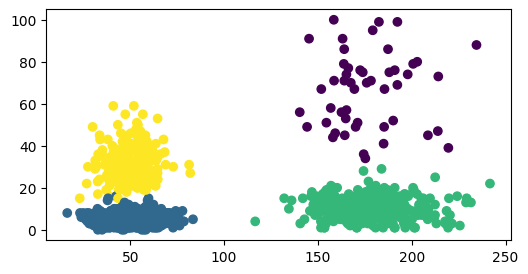

In [17]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pandas as pd
import matplotlib.pyplot as plt
 ## aplica kMeans ++
 ## P11. Tu código aquí ##

modelo_km = KMeans(n_clusters=4, random_state=42)
Dyp_sk = modelo_km.fit_predict(Dx)
cDx_sk = modelo_km.cluster_centers_

sil_km = silhouette_score(Dx, Dyp_sk)
ch_km = calinski_harabasz_score(Dx, Dyp_sk)

In [21]:
 ## aplica kMedoide
 ## P12. Tu código aquí ##

cDx_med, Dyp_med = MyKMedoide(Dx, 4)
sil_med = silhouette_score(Dx, Dyp_med)
ch_med = calinski_harabasz_score(Dx, Dyp_med)

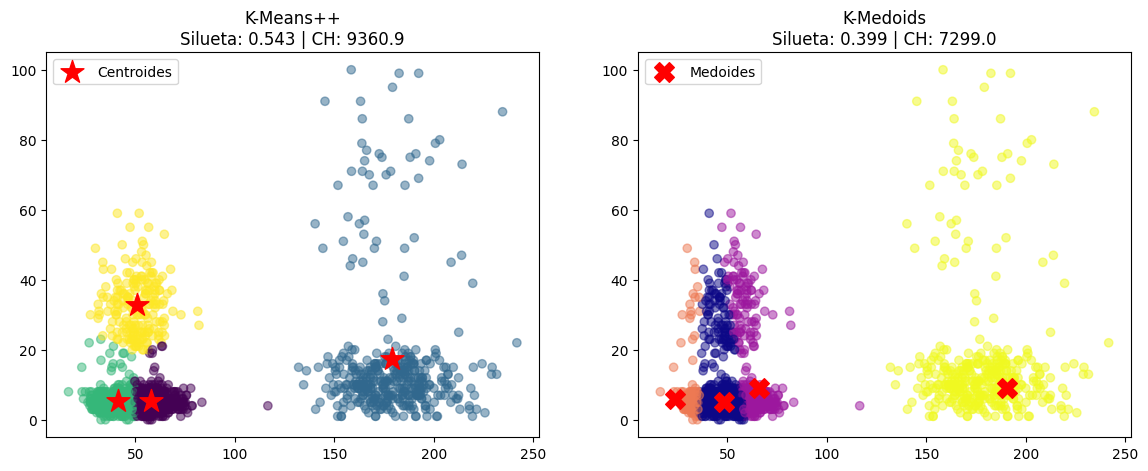

   Algoritmo  Silhouette (Max=1)  Calinski-Harabasz (Mayor es mejor)
0  K-Means++            0.543033                         9360.915279
1  K-Medoids            0.399211                         7299.040715


In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico K-Means
ax[0].scatter(Dx[:,0], Dx[:,1], c=Dyp_sk, cmap='viridis', alpha=0.5)
ax[0].scatter(cDx_sk[:,0], cDx_sk[:,1], marker='*', s=300, c='red', label='Centroides')
ax[0].set_title(f"K-Means++\nSilueta: {sil_km:.3f} | CH: {ch_km:.1f}")
ax[0].legend()

# Gráfico K-Medoids
ax[1].scatter(Dx[:,0], Dx[:,1], c=Dyp_med, cmap='plasma', alpha=0.5)
ax[1].scatter(cDx_med[:,0], cDx_med[:,1], marker='X', s=200, c='red', label='Medoides')
ax[1].set_title(f"K-Medoids\nSilueta: {sil_med:.3f} | CH: {ch_med:.1f}")
ax[1].legend()

plt.show()

resultados = pd.DataFrame({
    'Algoritmo': ['K-Means++', 'K-Medoids'],
    'Silhouette (Max=1)': [sil_km, sil_med],
    'Calinski-Harabasz (Mayor es mejor)': [ch_km, ch_med]
})
print(resultados)

**CONCLUSIÓN: ** Basado en los resultados obtenidos en la gráfica, se determina que K-Means++ superó significativamente a K-Medoids en el agrupamiento de este conjunto de datos, esto, debido a que K-Means++ obtuvo 0.543. Esto indica que los puntos están razonablemente bien cohesionados dentro de su clúster y separados de los demás, a pesar de la variación en la densidad.

# 🚀 ¡TALLER FINALIZADO!"